CUDA: True      Use << CUDA >>
PyTorch Version: 2.0.0
Shape of X [N, C, H, W]:
 torch.Size([64, 1, 28, 28])
Shape of y:
 torch.Size([64]) 
 torch.int64


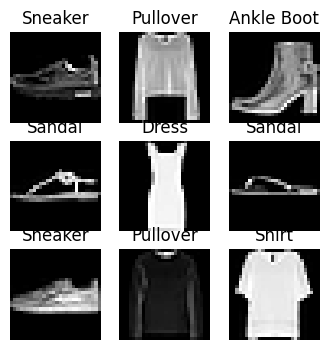

----- Epoch 1 -----


Training: 100%|█████████████████████████████████████████████████████████████████████| 938/938 [00:08<00:00, 114.56it/s]


Test Accuracy: 32.9%     Loss: 2.239119 

----- Epoch 2 -----


Training: 100%|█████████████████████████████████████████████████████████████████████| 938/938 [00:08<00:00, 115.23it/s]


Test Accuracy: 51.9%     Loss: 2.121720 

----- Epoch 3 -----


Training: 100%|█████████████████████████████████████████████████████████████████████| 938/938 [00:08<00:00, 116.31it/s]


Test Accuracy: 54.5%     Loss: 1.940919 

----- Epoch 4 -----


Training: 100%|█████████████████████████████████████████████████████████████████████| 938/938 [00:08<00:00, 116.15it/s]


Test Accuracy: 54.7%     Loss: 1.757087 

----- Epoch 5 -----


Training: 100%|█████████████████████████████████████████████████████████████████████| 938/938 [00:08<00:00, 115.68it/s]


Test Accuracy: 55.4%     Loss: 1.612125 

----- Epoch 6 -----


Training: 100%|█████████████████████████████████████████████████████████████████████| 938/938 [00:08<00:00, 115.89it/s]


Test Accuracy: 56.1%     Loss: 1.480979 

----- Epoch 7 -----


Training: 100%|█████████████████████████████████████████████████████████████████████| 938/938 [00:08<00:00, 115.98it/s]


Test Accuracy: 56.8%     Loss: 1.388294 

----- Epoch 8 -----


Training: 100%|█████████████████████████████████████████████████████████████████████| 938/938 [00:08<00:00, 113.13it/s]


Test Accuracy: 57.3%     Loss: 1.323137 

----- Epoch 9 -----


Training: 100%|█████████████████████████████████████████████████████████████████████| 938/938 [00:08<00:00, 115.63it/s]


Test Accuracy: 58.1%     Loss: 1.276515 

----- Epoch 10 -----


Training: 100%|█████████████████████████████████████████████████████████████████████| 938/938 [00:08<00:00, 115.84it/s]


Test Accuracy: 59.1%     Loss: 1.240691 



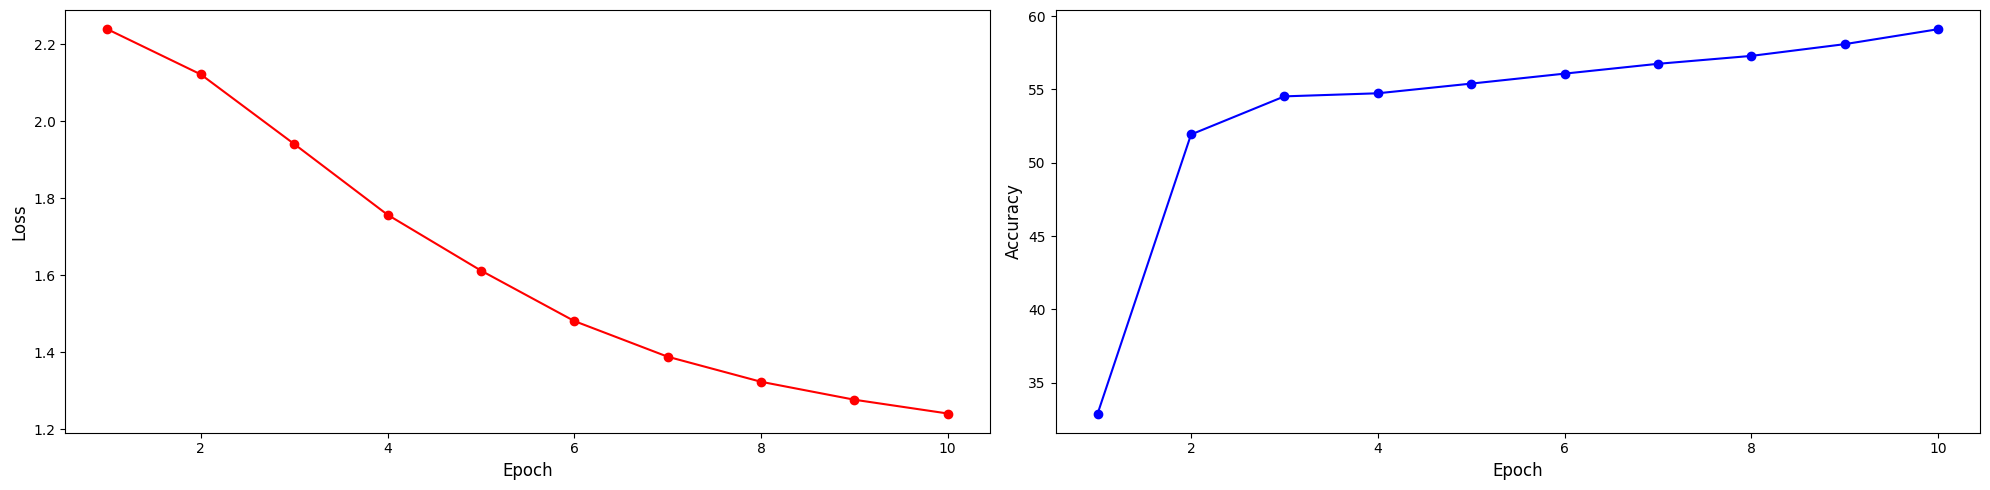

In [1]:
############################################################
# Import the Libraries
############################################################
 
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
 
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('CUDA:', torch.cuda.is_available(), '     Use << {} >>'.format(device.upper()))
print('PyTorch Version:', torch.__version__)
 
 
 
############################################################
# Get the Dataset
############################################################
 
# Download Dataset
train_data = datasets.FashionMNIST(
    root='data', train=True, download=True, transform=ToTensor()
)
test_data = datasets.FashionMNIST(
    root='data', train=False, download=True, transform=ToTensor()
)
 
# Build DataLoader
batch_size = 64
trainloader = DataLoader(
    train_data, batch_size=batch_size
)
testloader = DataLoader(
    test_data, batch_size=batch_size
)
 
# Check the Shape of Dataset
for X, y in testloader:
    print('Shape of X [N, C, H, W]:\n', X.shape)
    print('Shape of y:\n', y.shape, '\n', y.dtype)
    break     # Run For Loop Once
 
# Plot the Test Data from Dataset
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
 
fig = plt.figure(figsize=(4, 4))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    fig.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()
 
 
 
############################################################
# Build the Classifier, Train, and Test Function
############################################################
 
# Build NN
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.layer = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )
    def forward(self, x):
        x = self.flatten(x)
        Net_Out = self.layer(x)
        return Net_Out
 
# Build Train Function
def train(dataloader, model, loss_fn, optimizer):
    pbar = tqdm(dataloader, desc=f'Training')
    for batch, (X, y) in enumerate(pbar):
        # X, y = X.to(device), y.to(device)
 
        # Feedforward
        pred = model(X)
 
        # Calc. Loss
        loss = loss_fn(pred, y)
 
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
 
# Build Test Function
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    loss, correct = 0,0
    with torch.no_grad():
        for X, y in dataloader:
            # X, y = X.to(device), y.to(device)
            pred = model(X)
            loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    loss /= num_batches
    correct /= size
    print(f'Test Accuracy: {(100*correct):>0.1f}%     Loss: {loss:>8f} \n')
 
    return 100*correct, loss
 
 
 
############################################################
# Run the Training and Evaluation
############################################################
 
# Generate the Model
model = Net()
model = model.to('cpu')
 
# Set the Training Parameters
lr = 1e-3
loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=lr)
 
# Plot
fig = plt.figure(figsize=(20,5))
line1, line2 = plt.plot([],[],[],[])
plt.clf()
 
# Train the Network
epochs = 10
for t in range(epochs):
    print(f'----- Epoch {t+1} -----')
    train(trainloader, model, loss_fn, optimizer)
    accuracy, loss = test(testloader, model, loss_fn)
 
    # Add Accuracy & Loss to the Lines
    line1.set_xdata(np.append(line1.get_xdata(), t+1))
    line1.set_ydata(np.append(line1.get_ydata(), loss))
    line2.set_ydata(np.append(line2.get_ydata(), accuracy))
 
fig.add_subplot(1,2,1)
plt.plot(line1.get_xdata(), line1.get_ydata(), color='red')
plt.plot(line1.get_xdata(), line1.get_ydata(), 'o', color='red')
plt.xlabel('Epoch', fontsize=12); plt.ylabel('Loss', fontsize=12)
fig.add_subplot(1,2,2)
plt.plot(line1.get_xdata(), line2.get_ydata(), color='blue')
plt.plot(line1.get_xdata(), line2.get_ydata(), 'o', color='blue')
plt.xlabel('Epoch', fontsize=12); plt.ylabel('Accuracy', fontsize=12)
 
plt.tight_layout()
plt.autoscale()
plt.show()